# Support Vector Machines

In [68]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import sklearn.svm as svm # For SVM.
import itertools as itt
%matplotlib inline

In [46]:
# Load data.
data = io.loadmat(os.path.join('data', 'ex6data1.mat'))
X, y = data['X'], data['y'].flatten()

This data is similar to the data in exercise 2. So for visualization purposes we will separate it into positive (y = 1) and negative (y = 0) parts.

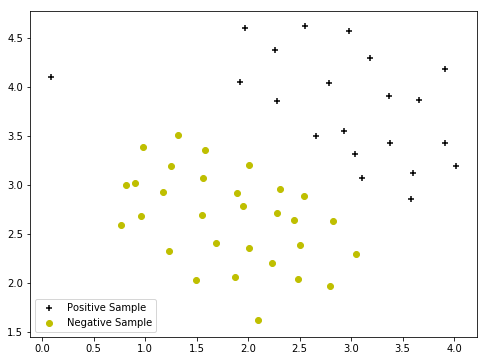

In [47]:
# Data visualization.
pos, neg = X[y==1], X[y==0]

def plot_data():
    plt.figure(figsize=(8, 6))
    plt.scatter(pos[:, 0], pos[:, 1], c='k', marker='+', label='Positive Sample')
    plt.scatter(neg[:, 0], neg[:, 1], c='y', marker='o', label='Negative Sample')
    plt.legend(loc='lower left')

plot_data()

## SVMs and decision boundaries

Scikit-learn has some excellent implementations of Support Vector Machines. Instead of implementing our own support vector machine, we will use one of theirs. For the purposes of this assignment we will use the SVC class.
For plotting the decision boundaries we will follow the example with the iris dataset in scikit-learn's SVM [documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html).


In [ ]:
# Function for plotting the decision boundary.
def plot_boundary(trained_svm, x1_min, x1_max, x2_min, x2_max):
    x1_vals = np.linspace(x1_min, x1_max, 100)[:, None]
    x2_vals = np.linspace(x2_min, x2_max, 100)[:, None]
    
    xx_vals, yy_vals = np.meshgrid(x1_vals, x2_vals) 
    zz_vals = trained_svm.predict(np.c_[xx_vals.ravel(), yy_vals.ravel()])
    zz_vals = zz_vals.reshape(xx_vals.shape)
    
    plt.contour(xx_vals, yy_vals, zz_vals)
    plt.title("Decision Boundary")

### SVM with linear kernel

In [40]:
# C is the regularization paramater.
def linear_svm(C=1):
    return svm.SVC(C, kernel='linear')

#### Decision boundary plots

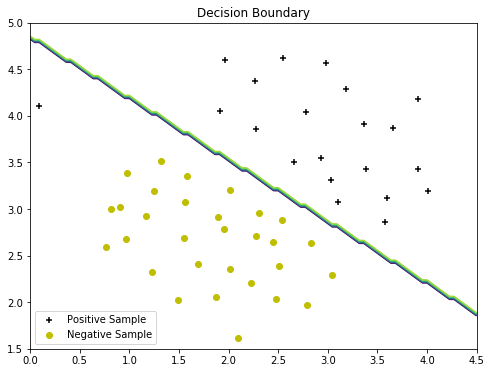

In [48]:
# C = 1. The outlier is not classified in the right group.

l_svm_1 = linear_svm(1)
l_svm_1.fit(X, y)

plot_data()
plot_boundary(l_svm_1, 0, 4.5, 1.5, 5)

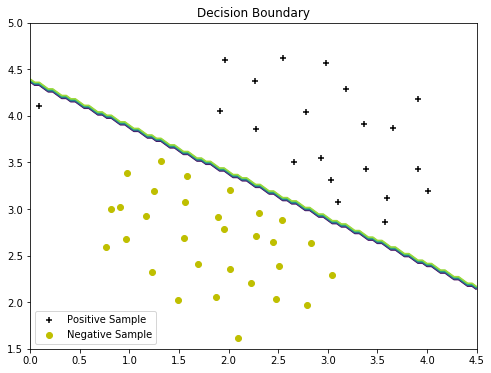

In [49]:
# C = 10. The outlier is still not classified in the right group.

l_svm_10 = linear_svm(10)
l_svm_10.fit(X, y)

plot_data()
plot_boundary(l_svm_10, 0, 4.5, 1.5, 5)

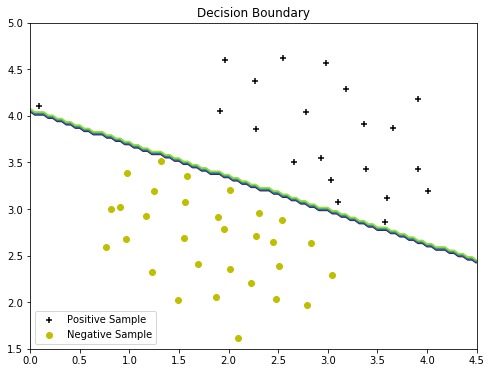

In [50]:
# C = 100. The outlier is now classified in the right group. 
# But the decision boundary is now too close to some of the data points.
# This is an indication of overfit.

l_svm_100 = linear_svm(100)
l_svm_100.fit(X, y)

plot_data()
plot_boundary(l_svm_100, 0, 4.5, 1.5, 5)

### SVM with Gaussian kernel

The Gaussian kernel essentially calculates the similarity between two points, weighted by a width parameter $\sigma$.

In [42]:
def gaussian_kernel(point1, point2, sigma):
    return np.exp(- np.linalg.norm(point1 - point2) ** 2 / sigma ** 2 / 2)

gaussian_kernel(np.array([1, 2, 1]), np.array([0, 4, -1]), 2)

0.32465246735834974

Scikit-learn provides an optimized gaussian kernel, rbf. We will use rbf instead of the gaussian_kernel defined above. In the rbf kernel instead of dividing the norm by $2\sigma^2$, it is multiplied by $\gamma$. So we will have to set $\gamma$ to $1/2\sigma^2$.

In [43]:
def gaussian_svm(sigma, C=1):
    gamma = 1 / 2 / sigma ** 2
    return svm.SVC(C, kernel='rbf', gamma=gamma)

We will use the `gaussian_svm` on the second dataset. 

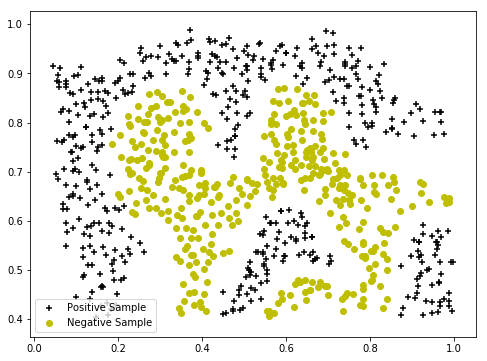

In [51]:
# Load and visualize the second dataset.
data = io.loadmat(os.path.join('data', 'ex6data2.mat'))
X, y = data['X'], data['y'].flatten()
pos, neg = X[y==1], X[y==0]
plot_data()

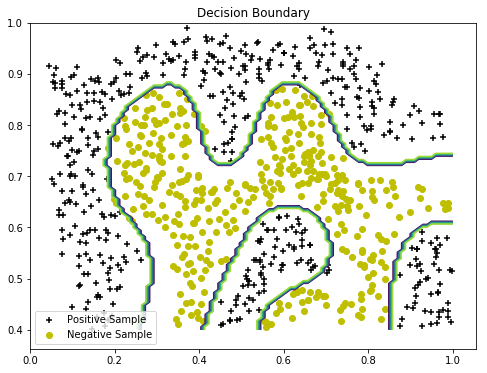

In [52]:
sigma = 0.1
g_svm = gaussian_svm(sigma)
g_svm.fit(X, y)
plot_data()
plot_boundary(g_svm, 0, 1, 0.4, 1)

We will now use cross-validation to choose the optimal regularization parameter. For this part of the exercise we will use the third dataset.

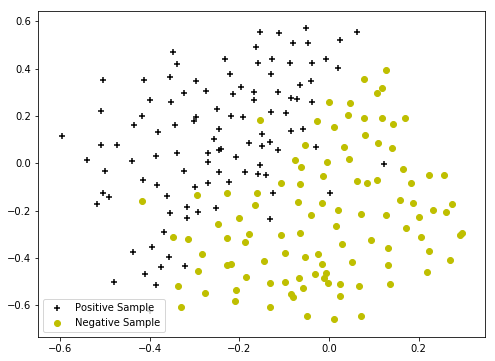

In [54]:
# Load and visualize the third dataset.
data = io.loadmat(os.path.join('data', 'ex6data3.mat'))
X, y = data['X'], data['y'].flatten()
Xval, yval = data['Xval'], data['yval'].flatten() # Validation data.
pos, neg = X[y==1], X[y==0]
plot_data()

In [69]:
param_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
product = itt.product(param_values, param_values)
g_svm_list = [gaussian_svm(sigma=sigma, C=C) for sigma, C in product]
scores_dict = {g_svm.fit(X, y).score(Xval, yval):(g_svm.C, 1 / np.sqrt(2 * g_svm.gamma)) for g_svm in g_svm_list}
best_C, best_sigma = scores_dict[max(scores_dict)]

In [70]:
best_C, best_sigma

(1, 0.3)

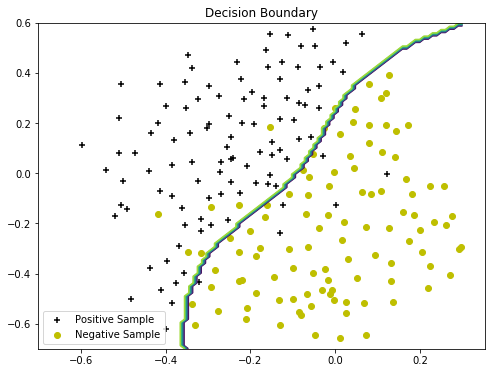

In [84]:
g_svm = gaussian_svm(best_sigma, best_C)
g_svm.fit(X, y)
plot_data()
plot_boundary(g_svm, -0.7, 0.3, -0.7, 0.6)